In [42]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc90/BHOSS_CODE"
data = "f05_b1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93M_130.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9291.054855 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 9.0701e-13 0.00204876
Total flux = 2.019398 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9003.597816 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 9.49303e-05
Total flux = 1.922476 Jy at 43 GHz
722:53:59.289 - Start Program


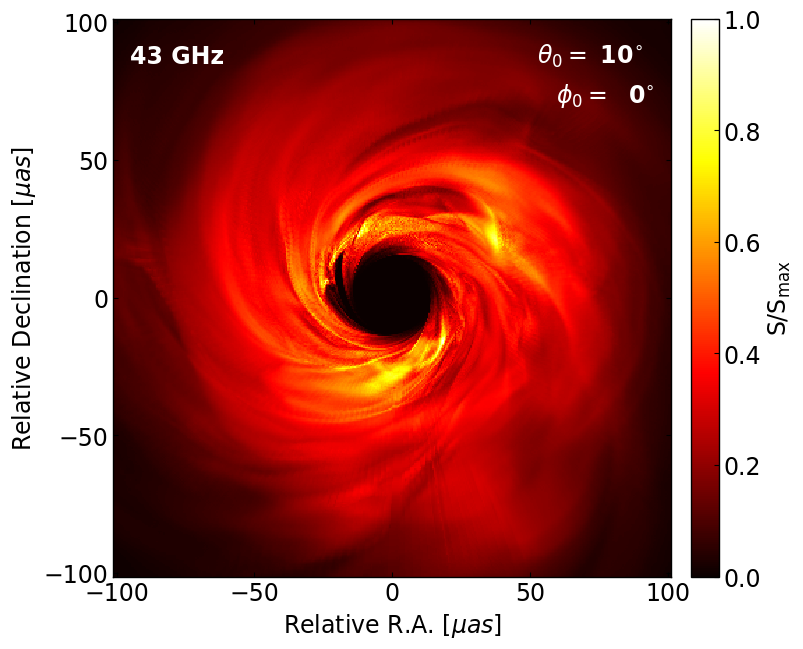

In [5]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [5]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,sig,inclination,phi0,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "MADS41A93M"):
        model_str = "bhoss_MA93M"
        ind_start = 101
        ind_end = 200
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%s%d.dat" \
        %(Te_model,sig,inclination,phi0,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [6]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,10,0,"MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.031906 at 9001.198332
102, flux: 1.935102 at 9010.849661
103, flux: 1.910124 at 9021.875029
104, flux: 1.902380 at 9031.530561
105, flux: 1.909103 at 9041.192296
106, flux: 1.912385 at 9050.864694
107, flux: 1.944297 at 9061.920379
108, flux: 2.002245 at 9071.596040
109, flux: 2.076600 at 9081.273790
110, flux: 2.144696 at 9090.952675
111, flux: 2.135918 at 9102.013838
112, flux: 2.175423 at 9111.700575
113, flux: 2.224571 at 9121.390170
114, flux: 2.285931 at 9131.076777
115, flux: 2.230479 at 9142.144593
116, flux: 2.235050 at 9151.823466
117, flux: 2.280973 at 9161.489103
118, flux: 2.410238 at 9171.161769
119, flux: 2.484272 at 9180.838314
120, flux: 2.515519 at 9191.897642
121, flux: 2.513038 at 9201.559302
122, flux: 2.481003 at 9211.210651
123, flux: 2.425041 at 9220.861682
124, flux: 2.345861 at 9231.893551
125, flux: 2.2

In [7]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [8]:
import numpy as np
import os
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 1.916228 Jy, the density scale = 1.400000e-18


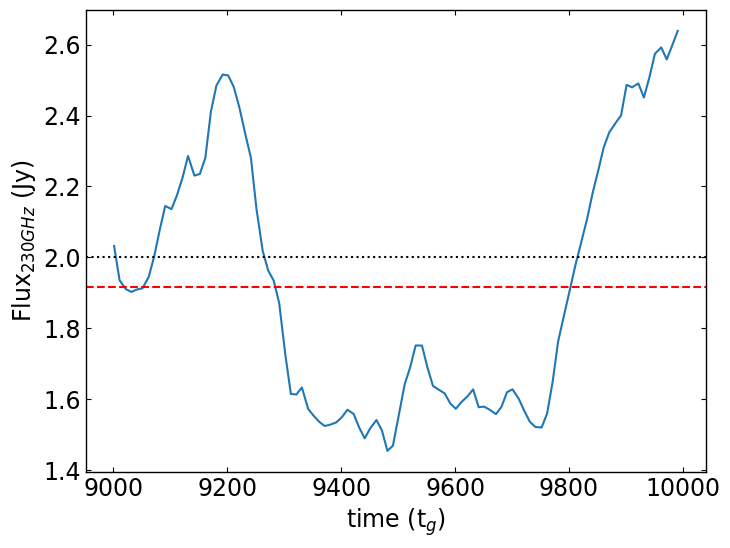

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [10]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

101:: 2.031906 Jy at 9001.198332
102:: 1.935102 Jy at 9010.849661
103:: 1.910124 Jy at 9021.875029
104:: 1.902380 Jy at 9031.530561
105:: 1.909103 Jy at 9041.192296
106:: 1.912385 Jy at 9050.864694
107:: 1.944297 Jy at 9061.920379
108:: 2.002245 Jy at 9071.596040
109:: 2.076600 Jy at 9081.273790
110:: 2.144696 Jy at 9090.952675
111:: 2.135918 Jy at 9102.013838
112:: 2.175423 Jy at 9111.700575
113:: 2.224571 Jy at 9121.390170
114:: 2.285931 Jy at 9131.076777
115:: 2.230479 Jy at 9142.144593
116:: 2.235050 Jy at 9151.823466
117:: 2.280973 Jy at 9161.489103
118:: 2.410238 Jy at 9171.161769
119:: 2.484272 Jy at 9180.838314
120:: 2.515519 Jy at 9191.897642
121:: 2.513038 Jy at 9201.559302
122:: 2.481003 Jy at 9211.210651
123:: 2.425041 Jy at 9220.861682
124:: 2.345861 Jy at 9231.893551
125:: 2.280047 Jy at 9241.541426
126:: 2.137319 Jy at 9251.174794
127:: 2.017879 Jy at 9262.194332
128:: 1.962531 Jy at 9271.823193
129:: 1.934518 Jy at 9281.443373
130:: 1.871568 Jy at 9291.054855
131:: 1.72

In [27]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,50,0,"MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 2.010888 at 9001.198332
102, flux: 2.017246 at 9010.849661
103, flux: 2.017411 at 9021.875029
104, flux: 2.094481 at 9031.530561
105, flux: 2.137505 at 9041.192296
106, flux: 2.138353 at 9050.864694
107, flux: 2.191481 at 9061.920379
108, flux: 2.257708 at 9071.596040
109, flux: 2.314831 at 9081.273790
110, flux: 2.421981 at 9090.952675
111, flux: 2.457475 at 9102.013838
112, flux: 2.508603 at 9111.700575
113, flux: 2.595121 at 9121.390170
114, flux: 2.686709 at 9131.076777
115, flux: 2.669234 at 9142.144593
116, flux: 2.728254 at 9151.823466
117, flux: 2.790055 at 9161.489103
118, flux: 2.908128 at 9171.161769
119, flux: 2.987131 at 9180.838314
120, flux: 3.070036 at 9191.897642
121, flux: 2.967165 at 9201.559302
122, flux: 2.783492 at 9211.210651
123, flux: 2.617756 at 9220.861682
124, flux: 2.481304 at 9231.893551
125, flux: 2.3

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 2.013453 Jy, the density scale = 1.200000e-18


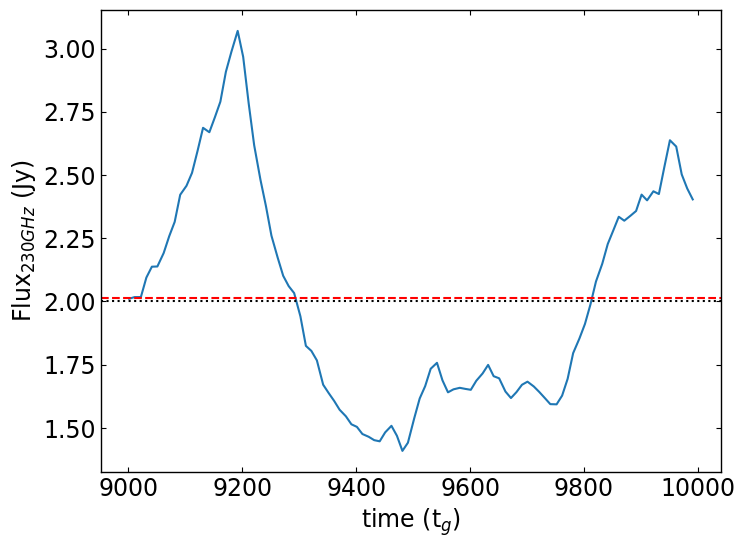

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

101:: 2.010888 Jy at 9001.198332
102:: 2.017246 Jy at 9010.849661
103:: 2.017411 Jy at 9021.875029
104:: 2.094481 Jy at 9031.530561
105:: 2.137505 Jy at 9041.192296
106:: 2.138353 Jy at 9050.864694
107:: 2.191481 Jy at 9061.920379
108:: 2.257708 Jy at 9071.596040
109:: 2.314831 Jy at 9081.273790
110:: 2.421981 Jy at 9090.952675
111:: 2.457475 Jy at 9102.013838
112:: 2.508603 Jy at 9111.700575
113:: 2.595121 Jy at 9121.390170
114:: 2.686709 Jy at 9131.076777
115:: 2.669234 Jy at 9142.144593
116:: 2.728254 Jy at 9151.823466
117:: 2.790055 Jy at 9161.489103
118:: 2.908128 Jy at 9171.161769
119:: 2.987131 Jy at 9180.838314
120:: 3.070036 Jy at 9191.897642
121:: 2.967165 Jy at 9201.559302
122:: 2.783492 Jy at 9211.210651
123:: 2.617756 Jy at 9220.861682
124:: 2.481304 Jy at 9231.893551
125:: 2.377024 Jy at 9241.541426
126:: 2.260255 Jy at 9251.174794
127:: 2.172944 Jy at 9262.194332
128:: 2.101528 Jy at 9271.823193
129:: 2.060768 Jy at 9281.443373
130:: 2.033141 Jy at 9291.054855
131:: 1.94

In [43]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,90,0,"MADS41A93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
101, flux: 1.909274 at 9001.198332
102, flux: 1.979971 at 9010.849661
103, flux: 2.032405 at 9021.875029
104, flux: 2.231901 at 9031.530561
105, flux: 2.262714 at 9041.192296
106, flux: 2.311985 at 9050.864694
107, flux: 2.309357 at 9061.920379
108, flux: 2.464503 at 9071.596040
109, flux: 2.426744 at 9081.273790
110, flux: 2.557036 at 9090.952675
111, flux: 2.650321 at 9102.013838
112, flux: 2.688019 at 9111.700575
113, flux: 2.886207 at 9121.390170
114, flux: 3.033132 at 9131.076777
115, flux: 3.022493 at 9142.144593
116, flux: 3.020034 at 9151.823466
117, flux: 2.903120 at 9161.489103
118, flux: 2.914940 at 9171.161769
119, flux: 2.890843 at 9180.838314
120, flux: 2.842295 at 9191.897642
121, flux: 2.806417 at 9201.559302
122, flux: 2.723825 at 9211.210651
123, flux: 2.644323 at 9220.861682
124, flux: 2.519444 at 9231.893551
125, flux: 2.4

In [44]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [45]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93M/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 101/200/100
average z_tot = 2.023343 Jy, the density scale = 1.040000e-18


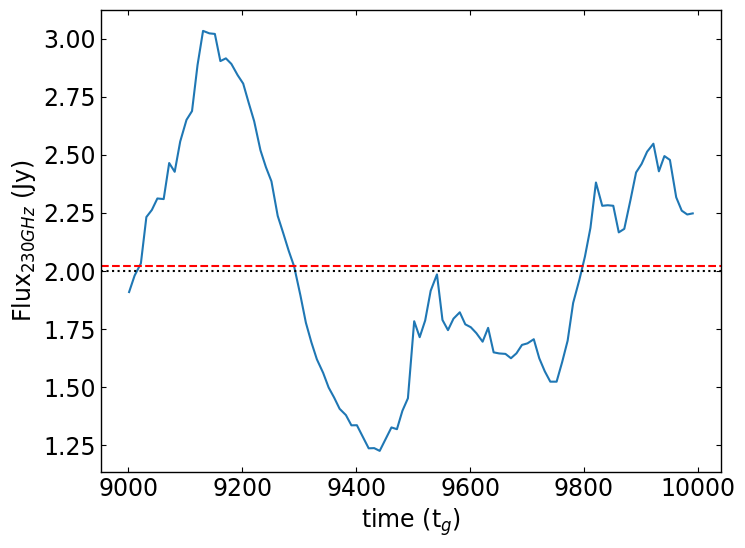

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [47]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

101:: 1.909274 Jy at 9001.198332
102:: 1.979971 Jy at 9010.849661
103:: 2.032405 Jy at 9021.875029
104:: 2.231901 Jy at 9031.530561
105:: 2.262714 Jy at 9041.192296
106:: 2.311985 Jy at 9050.864694
107:: 2.309357 Jy at 9061.920379
108:: 2.464503 Jy at 9071.596040
109:: 2.426744 Jy at 9081.273790
110:: 2.557036 Jy at 9090.952675
111:: 2.650321 Jy at 9102.013838
112:: 2.688019 Jy at 9111.700575
113:: 2.886207 Jy at 9121.390170
114:: 3.033132 Jy at 9131.076777
115:: 3.022493 Jy at 9142.144593
116:: 3.020034 Jy at 9151.823466
117:: 2.903120 Jy at 9161.489103
118:: 2.914940 Jy at 9171.161769
119:: 2.890843 Jy at 9180.838314
120:: 2.842295 Jy at 9191.897642
121:: 2.806417 Jy at 9201.559302
122:: 2.723825 Jy at 9211.210651
123:: 2.644323 Jy at 9220.861682
124:: 2.519444 Jy at 9231.893551
125:: 2.446379 Jy at 9241.541426
126:: 2.385807 Jy at 9251.174794
127:: 2.237091 Jy at 9262.194332
128:: 2.163331 Jy at 9271.823193
129:: 2.087322 Jy at 9281.443373
130:: 2.019398 Jy at 9291.054855
131:: 1.89